As we know, ML algorithms cannot extraploate well. Lets chec kthe  that fact with some dataset.

In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2021-11-29 12:31:10--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2021-11-29 12:31:10 (27.8 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [5]:
df= pd.read_csv('airline_passengers.csv', index_col ='Month', parse_dates = True)
df['LogPassengers'] = np.log(df['Passengers'])


In [6]:
Ntest = 12 
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [7]:
series = df['LogPassengers'].to_numpy()

In [9]:
T = 10 
X = []
Y = []

for t in range(len(series) - T):
    x = series[t: t+ T]
    X.append(x)
    y = series[t+T]
    Y.append(y)


In [11]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)


In [12]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [15]:
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
lr.score(Xtrain, Ytrain)

0.9599443783339898

In [16]:
lr.score(Xtest, Ytest)

0.6910953044565602

In [20]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [19]:
train.index[-1]

Timestamp('1959-12-01 00:00:00')

In [17]:
train_idx = df.index <= train.index[-1]
train_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [21]:
test_idx = ~train_idx

In [22]:
test_idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [23]:
train_idx[:T] = False # first T values are not predictable

In [24]:
train_idx

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [25]:
df.loc[train_idx, 'LR_1step_train'] = lr.predict(Xtrain)


In [26]:
df.loc[test_idx, 'LR_1step_test'] = lr.predict(Xtest)

In [31]:
Xtest

array([[6.00635316, 5.98141421, 6.04025471, 6.15697899, 6.30627529,
        6.32614947, 6.13772705, 6.00881319, 5.89164421, 6.00388707],
       [5.98141421, 6.04025471, 6.15697899, 6.30627529, 6.32614947,
        6.13772705, 6.00881319, 5.89164421, 6.00388707, 6.03308622],
       [6.04025471, 6.15697899, 6.30627529, 6.32614947, 6.13772705,
        6.00881319, 5.89164421, 6.00388707, 6.03308622, 5.96870756],
       [6.15697899, 6.30627529, 6.32614947, 6.13772705, 6.00881319,
        5.89164421, 6.00388707, 6.03308622, 5.96870756, 6.03787092],
       [6.30627529, 6.32614947, 6.13772705, 6.00881319, 5.89164421,
        6.00388707, 6.03308622, 5.96870756, 6.03787092, 6.13339804],
       [6.32614947, 6.13772705, 6.00881319, 5.89164421, 6.00388707,
        6.03308622, 5.96870756, 6.03787092, 6.13339804, 6.15697899],
       [6.13772705, 6.00881319, 5.89164421, 6.00388707, 6.03308622,
        5.96870756, 6.03787092, 6.13339804, 6.15697899, 6.28226675],
       [6.00881319, 5.89164421, 6.0038870

In [30]:
lr.predict(Xtest)

array([6.10119801, 6.04923433, 5.98700012, 6.03485203, 6.24464184,
       6.28979353, 6.31967252, 6.31516959, 6.30553403, 6.17699161,
       6.05776807, 5.945701  ])

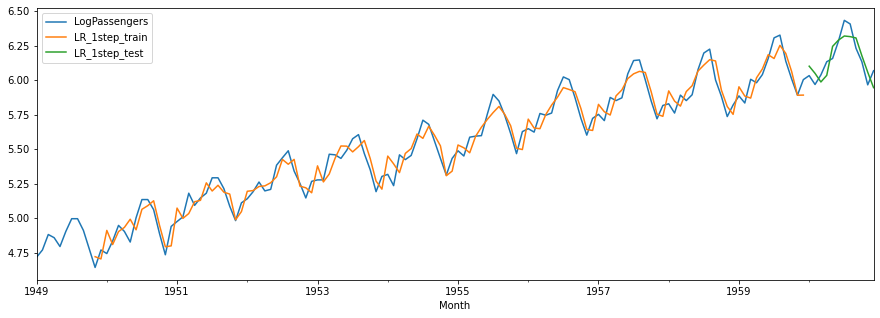

In [27]:
# plot 1-step forecast

df[['LogPassengers', 'LR_1step_train', 'LR_1step_test']].plot(figsize=(15, 5));

Multi step Forecast

In [28]:
multistep_predictions = []


# first test input
last_x = Xtest[0]


while len(multistep_predictions) < Ntest:
    p = lr.predict(last_x.reshape(1, -1))[0]
    # update the predictions list
    multistep_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p



In [32]:
# save multi-step forecast to dataframe
df.loc[test_idx, 'LR_multistep'] = multistep_predictions

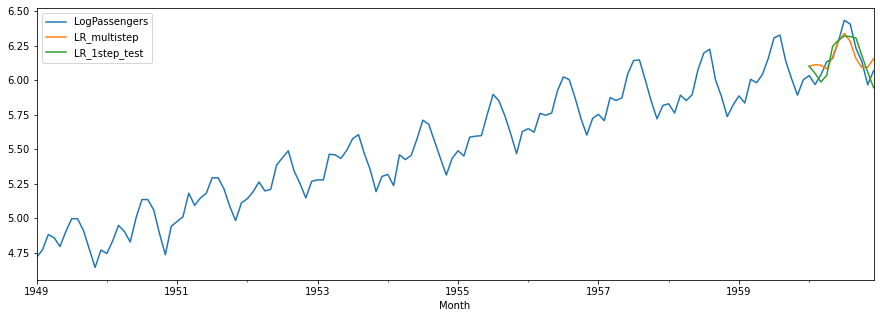

In [33]:
# plot 1-step and multi-step forecast
df[['LogPassengers', 'LR_multistep', 'LR_1step_test']].plot(figsize=(15, 5));

Multi Output Model

In [44]:
Ntest

12

In [45]:
series

array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
       4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
       4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989,
       4.90527478, 4.82831374, 5.00394631, 5.13579844, 5.13579844,
       5.06259503, 4.89034913, 4.73619845, 4.94164242, 4.97673374,
       5.01063529, 5.18178355, 5.0937502 , 5.14749448, 5.18178355,
       5.29330482, 5.29330482, 5.21493576, 5.08759634, 4.98360662,
       5.11198779, 5.14166356, 5.19295685, 5.26269019, 5.19849703,
       5.20948615, 5.38449506, 5.43807931, 5.48893773, 5.34233425,
       5.25227343, 5.14749448, 5.26785816, 5.27811466, 5.27811466,
       5.46383181, 5.45958551, 5.433722  , 5.49306144, 5.5759491 ,
       5.60580207, 5.46806014, 5.35185813, 5.19295685, 5.30330491,
       5.31811999, 5.23644196, 5.45958551, 5.42495002, 5.45532112,
       5.5759491 , 5.71042702, 5.68017261, 5.55682806, 5.433722  ,
       5.31320598, 5.433722  , 5.48893773, 5.45103845, 5.58724

In [50]:
Tx = T 
Ty = Ntest 
X = []
Y = [] 

for t in range(len(series) - Tx - Ty + 1):
    x= series[t:t+Tx]
    X.append(x)

    print("X",x)
    y = series[t+Tx:t+Tx+Ty]
    print("Y",y)
    Y.append(y)
    


X [4.71849887 4.77068462 4.88280192 4.8598124  4.79579055 4.90527478
 4.99721227 4.99721227 4.91265489 4.77912349]
Y [4.6443909  4.77068462 4.74493213 4.83628191 4.94875989 4.90527478
 4.82831374 5.00394631 5.13579844 5.13579844 5.06259503 4.89034913]
X [4.77068462 4.88280192 4.8598124  4.79579055 4.90527478 4.99721227
 4.99721227 4.91265489 4.77912349 4.6443909 ]
Y [4.77068462 4.74493213 4.83628191 4.94875989 4.90527478 4.82831374
 5.00394631 5.13579844 5.13579844 5.06259503 4.89034913 4.73619845]
X [4.88280192 4.8598124  4.79579055 4.90527478 4.99721227 4.99721227
 4.91265489 4.77912349 4.6443909  4.77068462]
Y [4.74493213 4.83628191 4.94875989 4.90527478 4.82831374 5.00394631
 5.13579844 5.13579844 5.06259503 4.89034913 4.73619845 4.94164242]
X [4.8598124  4.79579055 4.90527478 4.99721227 4.99721227 4.91265489
 4.77912349 4.6443909  4.77068462 4.74493213]
Y [4.83628191 4.94875989 4.90527478 4.82831374 5.00394631 5.13579844
 5.13579844 5.06259503 4.89034913 4.73619845 4.94164242 4.97

In [51]:
X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (123, 10) Y.shape (123, 12)


In [52]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [53]:
Xtest_m

array([[6.00635316, 5.98141421, 6.04025471, 6.15697899, 6.30627529,
        6.32614947, 6.13772705, 6.00881319, 5.89164421, 6.00388707]])

In [54]:
lr = LinearRegression()
lr.fit(Xtrain_m, Ytrain_m)
lr.score(Xtrain_m, Ytrain_m)

0.9734607773512528

In [55]:
r2_score(lr.predict(Xtest_m).flatten(), Ytest_m.flatten())

0.8018749676715189

In [56]:
# save multi-output forecast to dataframe
df.loc[test_idx, 'LR_multioutput'] = lr.predict(Xtest_m).flatten()

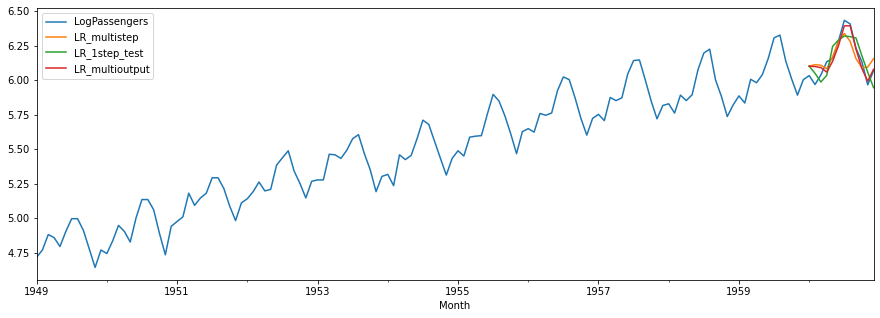

In [57]:
# plot all forecasts
cols = ['LogPassengers', 'LR_multistep', 'LR_1step_test', 'LR_multioutput']
df[cols].plot(figsize=(15, 5));

In [58]:
# MAPE
mape1 = mean_absolute_percentage_error(Ytest, multistep_predictions)
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    Ytest, df.loc[test_idx, 'LR_multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.012229325023475299
multi-output MAPE: 0.007178924475039815


In [59]:
def one_step_and_multistep_forecast(model, name):
  model.fit(Xtrain, Ytrain)
  print("One-step forecast:", name)
  # print("Train R^2:", model.score(Xtrain, Ytrain))
  # print("Test R^2 (1-step):", model.score(Xtest, Ytest))

  # store 1-step forecast
  df.loc[train_idx, f'{name}_1step_train'] = model.predict(Xtrain)
  df.loc[test_idx, f'{name}_1step_test'] = model.predict(Xtest)

  # generate multi-step forecast
  multistep_predictions = []

  # first test input
  last_x = Xtest[0]

  while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    
    # update the predictions list
    multistep_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
  
  # store multi-step forecast
  df.loc[test_idx, f'{name}_multistep_test'] = multistep_predictions

  # MAPE of multi-step forecast
  mape = mean_absolute_percentage_error(Ytest, multistep_predictions)
  print("Test MAPE (multi-step):", mape)

  # plot 1-step and multi-step forecast
  cols = [
    'LogPassengers',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test'
  ]
  df[cols].plot(figsize=(15, 5));

One-step forecast: SVR
Test MAPE (multi-step): 0.017529446164230467


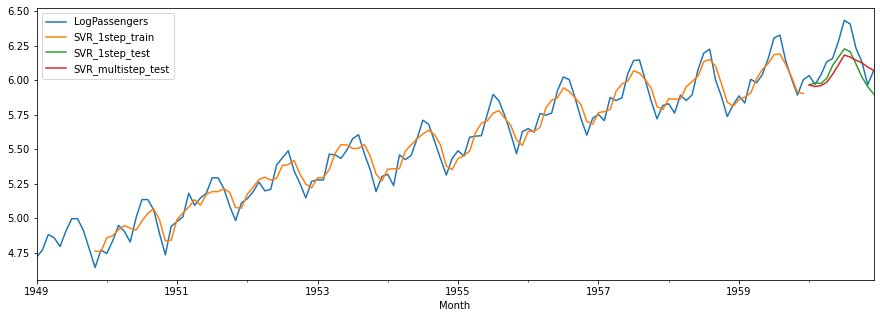

In [60]:
one_step_and_multistep_forecast(SVR(), "SVR")

One-step forecast: RF
Test MAPE (multi-step): 0.027657969188276132


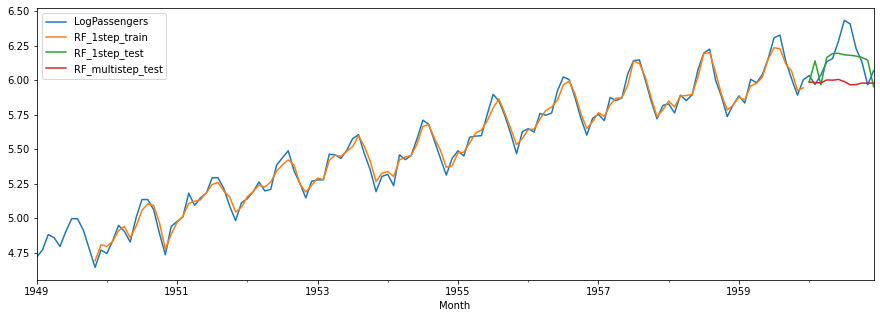

In [61]:
one_step_and_multistep_forecast(RandomForestRegressor(), "RF")

In [62]:
def multi_output_forecast(model, name):
  model.fit(Xtrain_m, Ytrain_m)
  
  # save multi-output forecast to dataframe
  df.loc[test_idx, f'{name}_multioutput'] = model.predict(Xtest_m).flatten()

  mape = mean_absolute_percentage_error(
      Ytest, df.loc[test_idx, f'{name}_multioutput'])
  print("Test MAPE (multi-output):", mape)

  # plot all forecasts
  # assume that previous functions have been run
  cols = [
    'LogPassengers',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test',
    f'{name}_multioutput',
  ]
  df[cols].plot(figsize=(15, 5));

In [63]:
multi_output_forecast(SVR(), "SVR") # cannot handle multi-output!
# But: you can still train multiple separate SVRs

ValueError: ignored

Test MAPE (multi-output): 0.016859519883587696


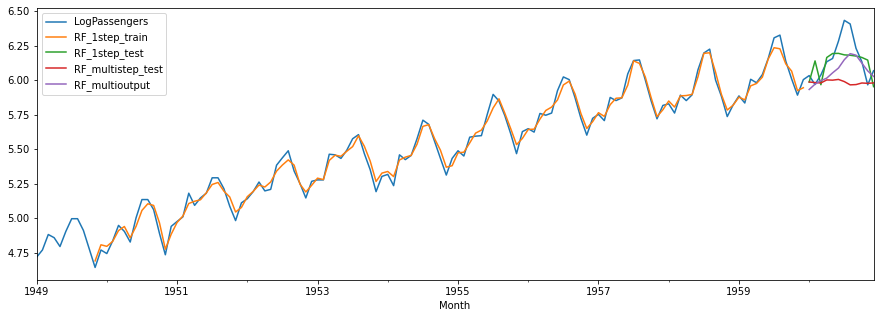

In [64]:
multi_output_forecast(RandomForestRegressor(), "RF")